# Marketing Insight

This project was generated to identify insights that will optimize marketing strategy. 






Data source: Standard Shopify Data. Shopify is a subscription-based software that allows anyone to set up an online store and sell their products. 



In [1]:
# Importing the necessary libraries
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
import pandas as pd
%matplotlib inline

In [2]:
# Importing Data Analysis Librarys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings


### Getting the data and loading it into the pandas dataframe

In [3]:
df = pd.read_csv('shopify_data_seller2.csv')
df.head()

,page_type,location_country,referrer_host,ua_os,hour,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor,referrer_source,referrer_name
0,Homepage,Dominica,jones-shelton.com,Mac OS X,2020-10-17 17:00:00,0,0,0,1,1,0.000000,1.0,Desktop,Unknown,NaN
1,Homepage,Gabon,Unknown,iOS,2019-09-28 06:00:00,0,0,0,1,1,0.000000,1.0,Mobile,NaN,NaN
2,Unknown,Bosnia and Herzegovina,Unknown,Linux,2021-01-07 19:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
3,Homepage,Dominica,Unknown,Mac OS X,2021-06-27 09:00:00,0,0,0,1,1,0.000000,1.0,Desktop,NaN,NaN
4,Product,Saint Helena,l.instagram.com,Android,2020-11-14 10:00:00,2,3,4,7,14,0.285714,0.0,Mobile,Social,Instagram


In [4]:
#Checking the data type of each column to understand the type of analysis each needs
df.dtypes


page_type               object
location_country        object
referrer_host           object
ua_os                   object
hour                    object
total_orders_placed      int64
total_checkouts          int64
total_carts              int64
total_sessions           int64
total_pageviews          int64
total_conversion       float64
total_bounce_rate      float64
ua_form_factor          object
referrer_source         object
referrer_name           object
dtype: object

In [5]:
print(df.shape) #check number of columns and rows

(25000, 15)


### Descriptive and Exploratory Statistics
This helps to understand the basic features of the data and obtain a short summary about the data. 


In [6]:
df.describe(include='all') #include ='all' includes all the columns (categorical, float, and integer columns)

,page_type,location_country,referrer_host,ua_os,hour,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate,ua_form_factor,referrer_source,referrer_name
count,25000,25000,25000,25000,25000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000,10491,4972
unique,9,62,44,11,13114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,7
top,Homepage,Bosnia and Herzegovina,Unknown,Android,2019-08-09 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mobile,Unknown,Instagram
freq,15265,6688,14509,7022,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14105,3548,2388
mean,NaN,NaN,NaN,NaN,NaN,0.414480,0.623280,0.828200,2.039680,2.871880,0.059554,0.896619,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,1.095525,1.705321,2.275964,2.844466,5.208085,0.137343,0.272584,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,NaN,NaN,NaN


The above shows the total count of each column; the number of unique values from the column (for categorical columns), the mean value for numeric columns. 

In [7]:
df.describe()

,total_orders_placed,total_checkouts,total_carts,total_sessions,total_pageviews,total_conversion,total_bounce_rate
count,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,0.414480,0.623280,0.828200,2.039680,2.871880,0.059554,0.896619
std,1.095525,1.705321,2.275964,2.844466,5.208085,0.137343,0.272584
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,11.000000,19.000000,26.000000,29.000000,57.000000,0.857143,1.000000


## Value counts for the Categorical Columns
This should provide more insight to understand the different customers and the operating system the majority customers use to access the webpage.


In [8]:
# Getting the Value count for user's device operating system
User_Value_counts = df['ua_os'].value_counts().to_frame()
User_Value_counts

,ua_os
Android,7022
iOS,6871
Linux,3798
Windows,3545
Mac OS X,2832
Other,543
Chrome OS,185
Fedora,126
Tizen,32
Windows Phone,27


Andriod users seem to be the highest operating system that access to the platform. Followed by iOS. 

In [9]:
# Getting the Value count for user's device type
user_device_type= df['ua_form_factor'].value_counts().to_frame()
user_device_type

,ua_form_factor
Mobile,14105
Desktop,10320
Other,575


In [10]:
# Getting the Value count for the type of referral
df_reffere_source= df['referrer_source'].value_counts().to_frame() 
df_reffere_source

,referrer_source
Unknown,3548
Social,3280
Direct,1971
Search,1692


In [10]:
# Getting the Value count for referrer name
df_reffere_name= df['referrer_name'].value_counts().to_frame()
df_reffere_name

,referrer_name
Instagram,2388
Google,1551
Facebook,892
Yahoo!,43
Bing,42
Yandex,29
DuckDuckGo,27


Grouping referrer_source, with referrer_name to investigate which source brought in more customers


In [11]:
#Groupby function
df_test = df [['total_checkouts', 'referrer_source', 'referrer_name',]]

#summing the total check out from each source and name
df_grp = df_test.groupby(['referrer_source', 'referrer_name'], as_index = False).sum()

#sorting the largest to the smallest
df_grp.sort_values('total_checkouts', ascending=False)

,referrer_source,referrer_name,total_checkouts
5,Social,Facebook,1905
2,Search,Google,1473
6,Social,Instagram,846
0,Search,Bing,112
4,Search,Yandex,18
3,Search,Yahoo!,4
1,Search,DuckDuckGo,0


### Interpretation
Advertisments on Facebook social media leads to more churn than any other media or search engine. More ads need to be target towards mobile social media.


In [14]:
df_pivot2 =df_grp.pivot(index ='referrer_name', columns ='referrer_source')
df_pivot2

total_checkouts        
referrer_source          Search  Social
referrer_name                          
Bing                      112.0     NaN
DuckDuckGo                  0.0     NaN
Facebook                    NaN  1905.0
Google                   1473.0     NaN
Instagram                   NaN   846.0
Yahoo!                      4.0     NaN
Yandex                     18.0     NaN

### Interpretation
This implies that Facebook brought in more customers than any of the social media channels, with
about 1905 total checkout. 

#### Recommendation
- Increase marketing resources on Facebook because Facebook users are the highest known customer source. An increase in the Facebook ads will leads to higher turnover.
- Hire more SEO to optimize the website with a focus on Google and Bing


In [15]:
# Creating a pivot table to know the total checkout that came from referre source and the specific name. 
df_pivot =df_grp.pivot(index ='referrer_name', columns ='referrer_source')
df_pivot

total_checkouts        
referrer_source          Search  Social
referrer_name                          
Bing                      112.0     NaN
DuckDuckGo                  0.0     NaN
Facebook                    NaN  1905.0
Google                   1473.0     NaN
Instagram                   NaN   846.0
Yahoo!                      4.0     NaN
Yandex                     18.0     NaN

In [16]:
#Groupby function by user device
df_test2 = df [['total_checkouts', 'referrer_source', 'referrer_name', 'ua_form_factor']]

df_grp2 = df_test2.groupby(['referrer_source', 'referrer_name','ua_form_factor'], as_index = False).sum()

#sorting the largest to the smallest
df_grp2.sort_values('total_checkouts', ascending=False)

,referrer_source,referrer_name,ua_form_factor,total_checkouts
16,Social,Facebook,Mobile,1549
7,Search,Google,Mobile,1210
19,Social,Instagram,Mobile,720
15,Social,Facebook,Desktop,208
8,Search,Google,Other,205
17,Social,Facebook,Other,148
20,Social,Instagram,Other,114
1,Search,Bing,Mobile,85
6,Search,Google,Desktop,58
2,Search,Bing,Other,17


## Visualization and Correlation

<AxesSubplot:xlabel='referrer_source', ylabel='total_checkouts'>

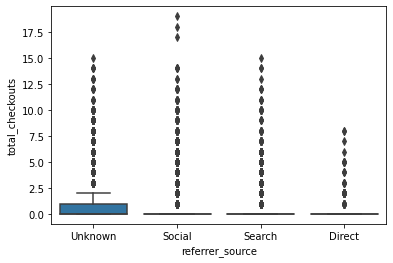

In [17]:
import seaborn as sns

#checking for outline from the referrer source
sns.boxplot(x='referrer_source', y ='total_checkouts', data =df) 

Social media has more outliers than any other refferer source. The customers from this source can be classified as agressive buyers and with countinous advertisement
this behavior can lead to higher returns for the company. 

Checking the relationship between the Features with regplot


(0.0, 19.95)

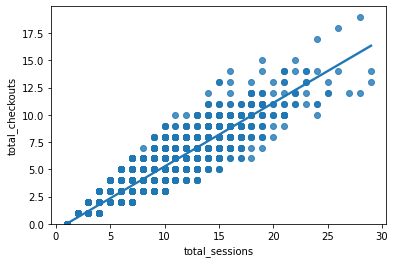

In [18]:
sns.regplot(x='total_sessions', y = 'total_checkouts', data=df)
plt.ylim(0,)

There is a strong correlation between the total session of a user and the total checkout. i.e. the more time spent on website the higher the chance of checking out an order. 
- Improving the landing page and making it more user friendly can boost this to yield more revenue. 

(0.0, 19.95)

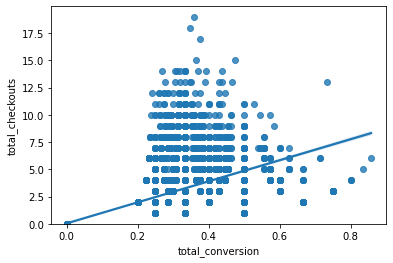

In [19]:
# checking the relationship between total conversion and total checkouts
sns.regplot(x='total_conversion', y = 'total_checkouts', data=df)
plt.ylim(0,)

There is a weak correlation between the total conversion and total checkout. No need for further investigation. Investment in total conversion does not lead to 
total checkout

(0.0, 19.95)

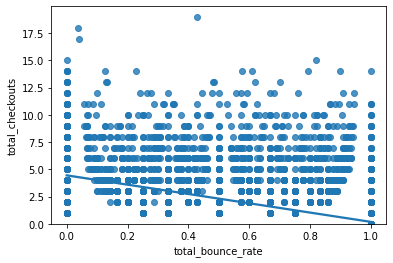

In [20]:
sns.regplot(x='total_bounce_rate', y = 'total_checkouts', data=df)
plt.ylim(0,)

There is a weak correlation between the total conversion and total checkout. No need for further investigation.

(0.0, 19.95)

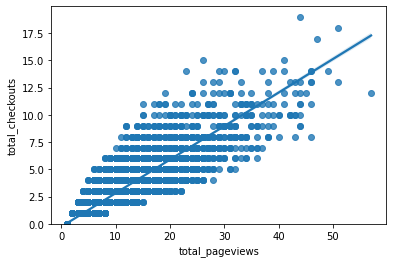

In [21]:
sns.regplot(x='total_pageviews', y = 'total_checkouts', data=df)
plt.ylim(0,)

There is a strong relationship between the total pageviews and total checkout. 
#### Recommendation
- Increase  resources on optimizing page views and increasing the span of time or hour a user stays on the webpage will increase the total checkout. i.e. more resources need to be moved to content creation